#### Example 1. Iris

##### numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data file
df = pd.read_csv("iris.csv")

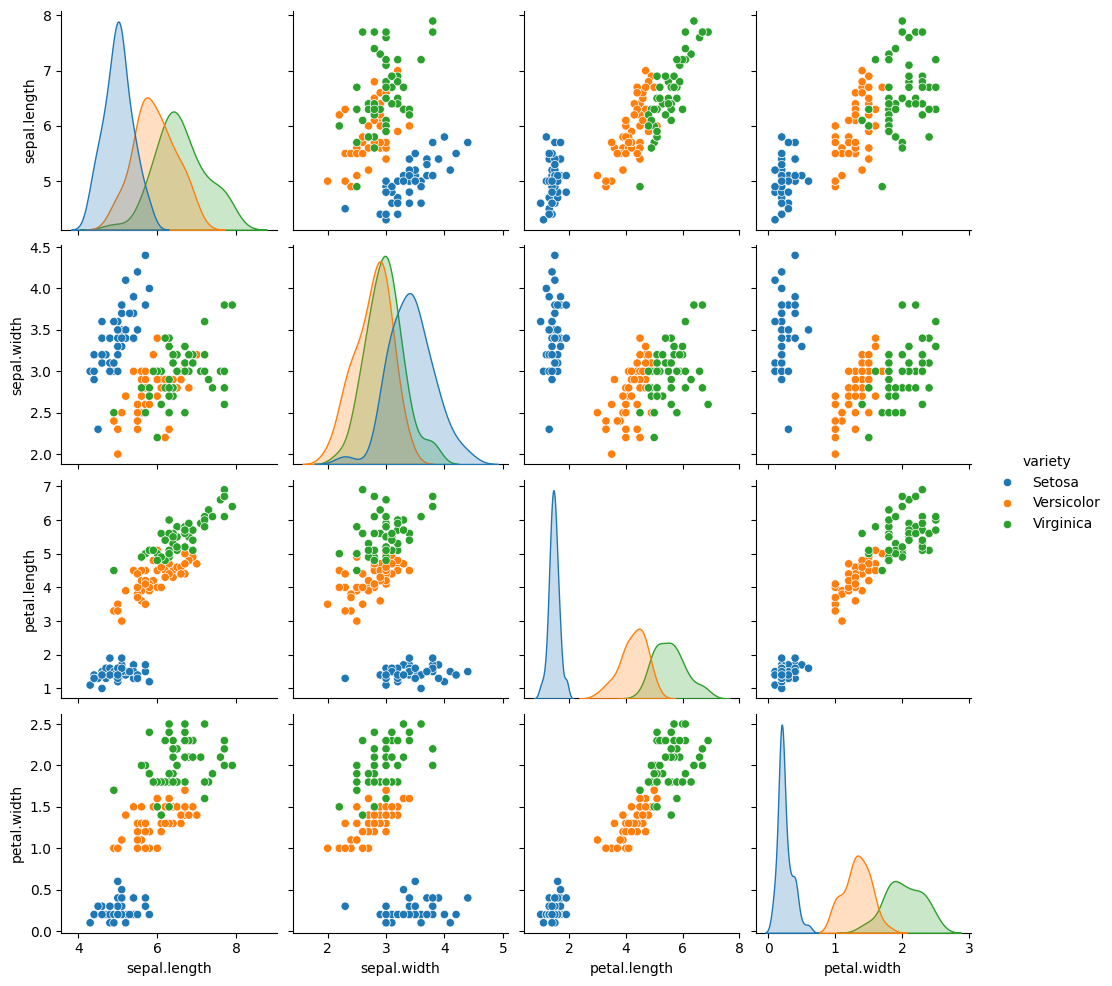

In [2]:
# show data information
df
df.describe()
sns.pairplot(df, hue='variety')

Text(0.5, 1.0, 'Correlation matrix')

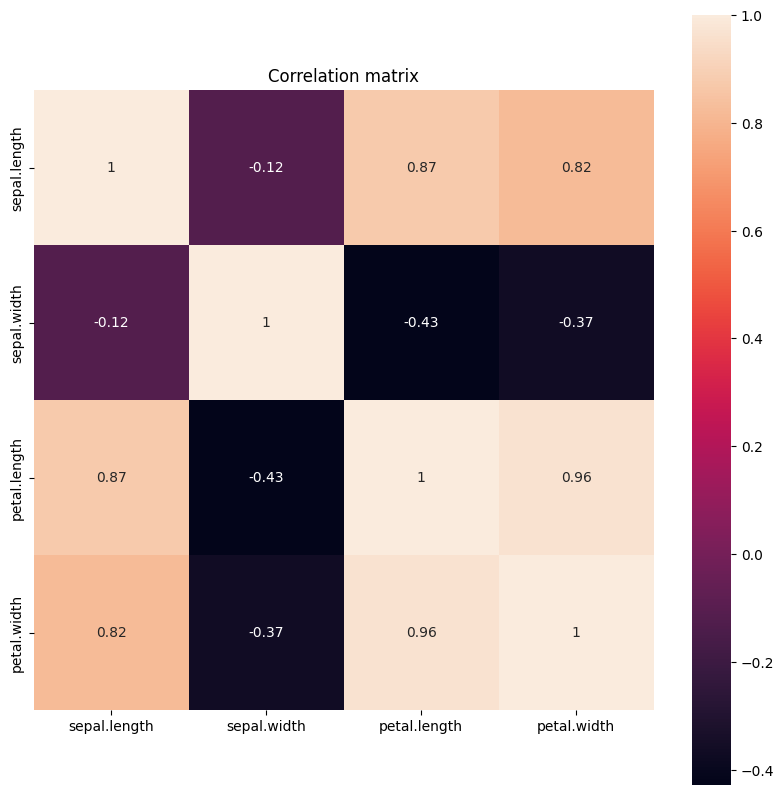

In [3]:
# We're seperating the species column
species = df["variety"].tolist()
X = df.drop("variety", axis=1)

# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [4]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

# method2
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([2.91849782, 0.91403047, 0.14675688, 0.02071484]), eigenvectors=array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

Text(0.5, 0, 'Dimensions')

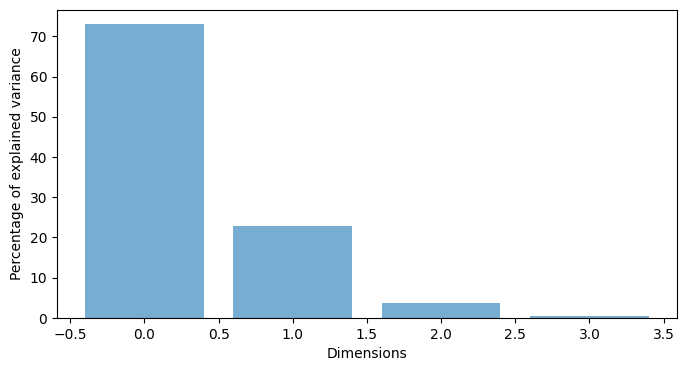

In [5]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [6]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

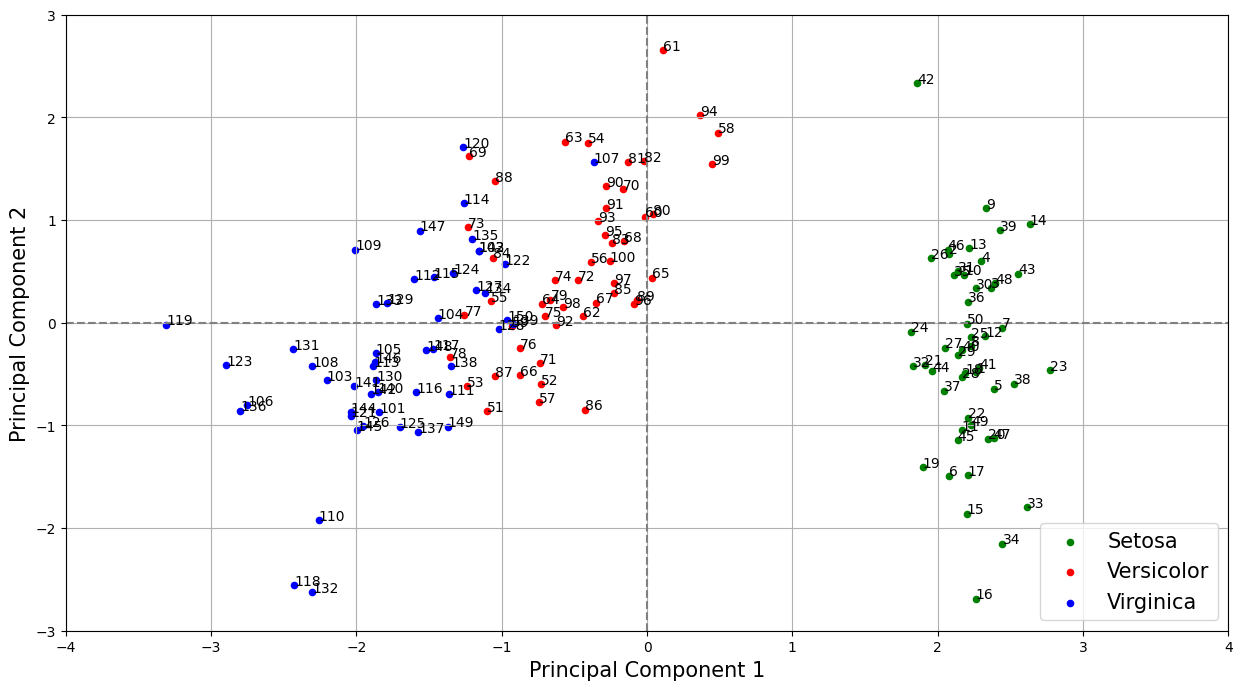

In [7]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)

##### scikit-learn

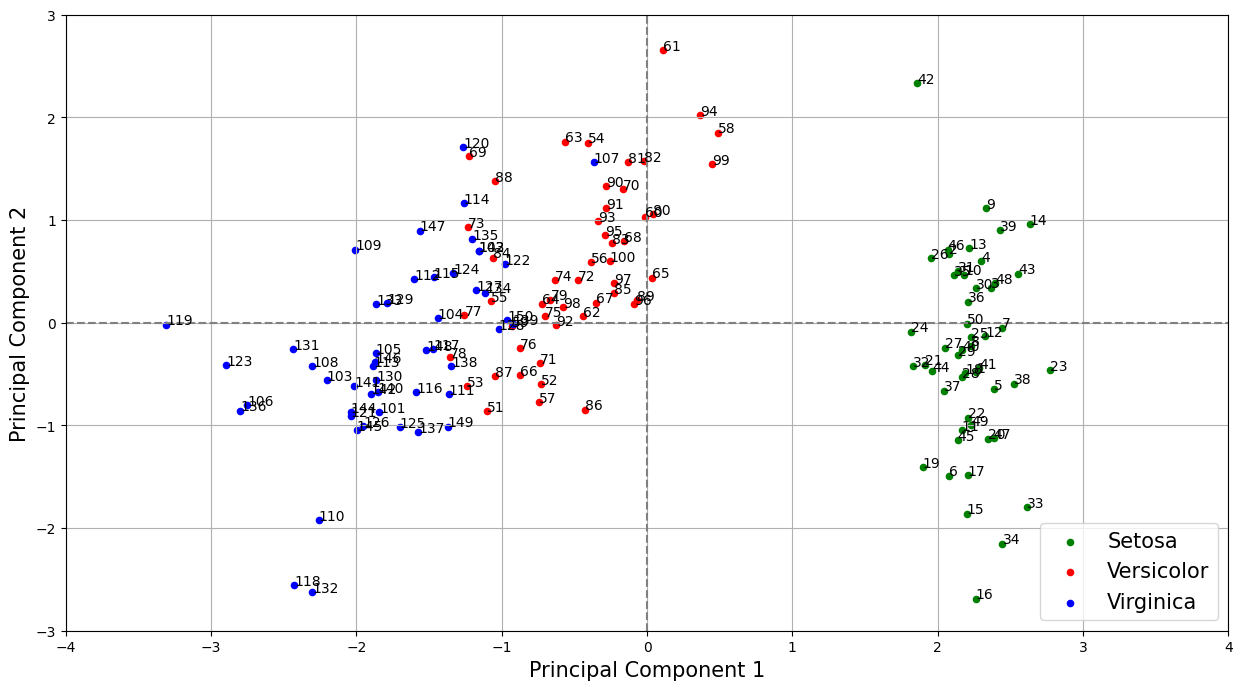

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data file
df = pd.read_csv("iris.csv")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)

# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

##### (1) visualize

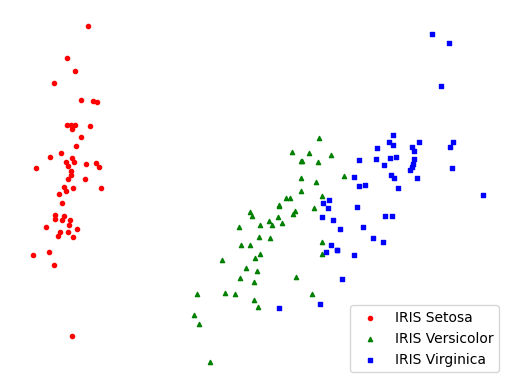

In [15]:
df = pd.read_csv("iris.csv")
Y = df['variety']
Y = Y.replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})
X = df.drop("variety", axis=1)

# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())

pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

# visualize
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

##### (2) Logistic Regression

(a) Chạy với dữ liệu nguyên bản

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=17, stratify=Y)
print(X_train.shape)
print(X_train[Y_train==0].shape)

(120, 4)
(40, 4)


In [12]:
# call Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)
# and train model by training set
lorg.fit(X_train,Y_train)

# make prediction on test set
Y_pred = lorg.predict(X_test)
Y_pred

array([1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       1, 0, 0, 2, 2, 2, 0, 2], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

# for accuracy
print('Accuracy:', accuracy_score(Y_test,Y_pred))
# for confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


(b) Chạy với dữ liệu giảm chiều

(i) Chia dữ liệu Train-Test -> giảm chiều

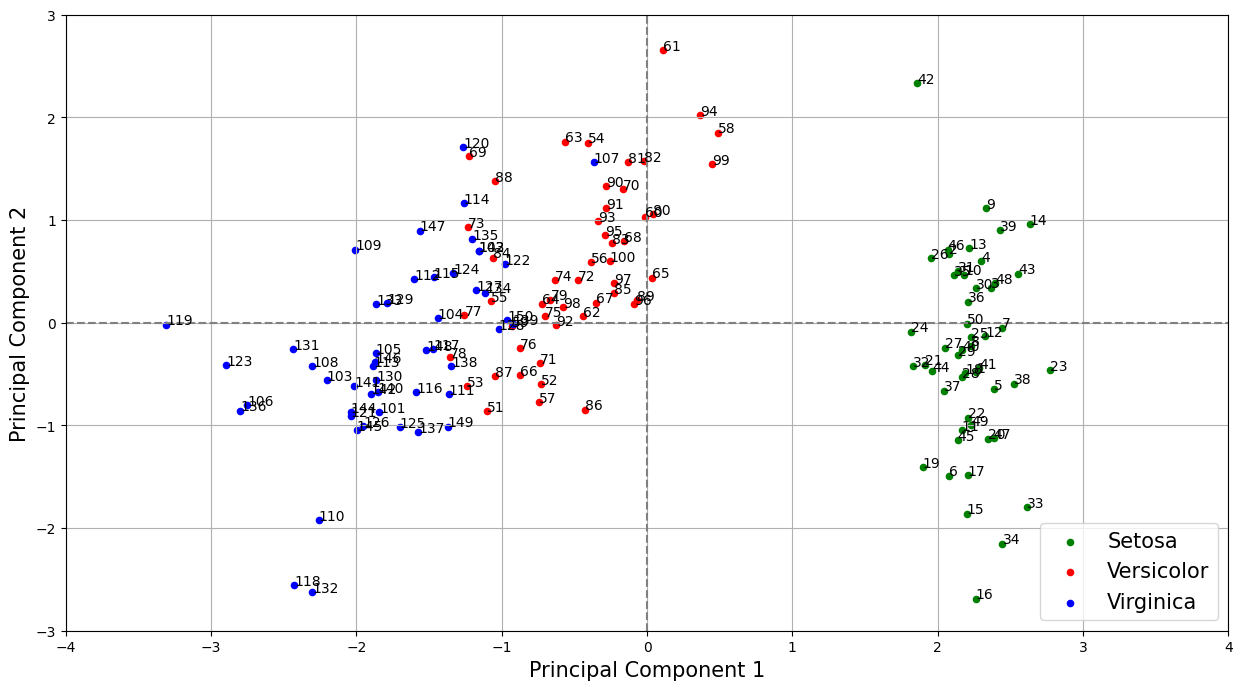

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)

# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

(ii) Giảm chiều -> chia dữ liệu Train-Test